In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat("project6data1.mat")

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data["X"]
y = data["y"]

X_test = data["Xtest"]
y_test = data["ytest"]

X_val = data["Xval"]
y_val = data["yval"]

m = y.shape[0]
m_val = y_val.shape[0]
m_test = y_test.shape[0]

print(m, m_val, m_test)

12 21 21


In [5]:
X.shape

(12, 1)

In [6]:
y.shape

(12, 1)

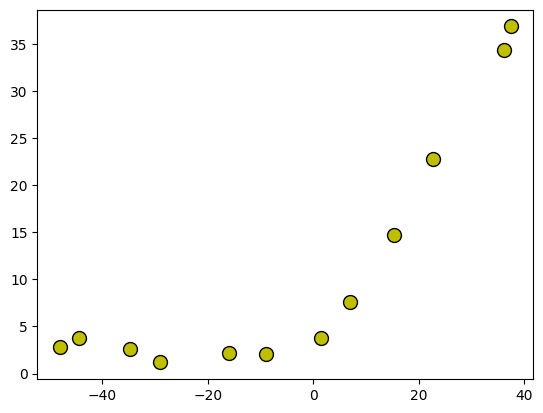

In [7]:
plt.plot(X, y, "yo", ms= 10, mec= "k")

In [8]:
X_ = np.transpose(X)
print(X_.shape)

(1, 12)


In [9]:
X_val_ = np.transpose(X_val)
print(X_val_.shape)

(1, 21)


In [10]:
X_test_ = np.transpose(X_test)
print(X_test_.shape)

(1, 21)


In [11]:
y_ = np.transpose(y)
print(y_.shape)

(1, 12)


In [12]:
y_val_ = np.transpose(y_val)
print(y_val_.shape)

(1, 21)


In [13]:
y_test_ = np.transpose(y_test)
print(y_test_.shape)

(1, 21)


In [14]:
X_ = np.concatenate([np.ones((1, m)), X_], axis= 0)
print(X_.shape)

(2, 12)


In [15]:
X_val_ = np.concatenate([np.ones((1, m_val)), X_val_], axis= 0)
print(X_val_.shape)

(2, 21)


In [16]:
X_test_ = np.concatenate([np.ones((1, m_test)), X_test_], axis= 0)
print(X_test_.shape)

(2, 21)


In [17]:
def Compute_Cost_With_Reg(X, y, theta_temp, lambda_):
  m = X.shape[1]
  temp = np.matmul(np.transpose(theta_temp), X) - y
  cost = np.matmul(temp, np.transpose(temp)) / (2 * m)
  cost_With_Reg = cost + (lambda_/ (2 * m)) * np.matmul(np.transpose(theta_temp[1:]), theta_temp[1:])

  return cost_With_Reg


In [18]:
theta = np.ones((X_.shape[0], 1))
cost_With_Reg = Compute_Cost_With_Reg(X_, y_, theta, lambda_= 1)
print("initial cost is:", cost_With_Reg)

initial cost is: [[303.99319222]]


In [19]:
def Gradient_Descent_With_Reg(X, y, theta_temp, lr, epochs, lambda_):
  m = X.shape[1]
  print(m)
  J_history = []
  for epoch in range(epochs):
    theta_temp_reg = theta_temp.copy()
    theta_temp_reg[0, 0] = 0
    h = np.matmul(np.transpose(theta_temp), X)
    temp = np.transpose(h - y)
    theta_temp = theta_temp - (lr / m) * (np.matmul(X, temp) + lambda_ * theta_temp_reg)
    if(epoch == 0):
      grad = (1 / m) * (np.matmul(X, temp) + lambda_ * theta_temp_reg)
    J_history.append(Compute_Cost_With_Reg(X, y, theta_temp, lambda_)[0, 0])

  return theta_temp, J_history, grad

In [20]:
theta = np.ones((X_.shape[0], 1))

epochs = 1000
lr = 0.001

theta_new, J_history, gradtest = Gradient_Descent_With_Reg(X_, y_, theta, lr, epochs, 1)

print(gradtest)
print("last cost: ", J_history[-1])

12
[[-15.30301567]
 [598.25074417]]
last cost:  32.55165315223135


In [21]:
print(J_history)

[97.82984187514873, 92.99648691028845, 92.75278175734748, 92.61395812683807, 92.47778359168949, 92.34192722594635, 92.20633539570372, 92.07100637972599, 91.93593964111218, 91.8011346709232, 91.6665909618199, 91.53230800746044, 91.3982853024846, 91.26452234251163, 91.1310186241382, 90.99777364493673, 90.86478690345332, 90.73205789920593, 90.5995861326825, 90.46737110533903, 90.33541231959774, 90.20370927884522, 90.07226148743051, 89.9410684506632, 89.8101296748117, 89.67944466710134, 89.54901293571233, 89.41883398977821, 89.28890733938375, 89.1592324955633, 89.02980897029876, 88.9006362765179, 88.77171392809248, 88.64304143983641, 88.51461832750385, 88.38644410778753, 88.25851829831686, 88.13084041765609, 88.00340998530254, 87.87622652168476, 87.74928954816075, 87.62259858701618, 87.49615316146254, 87.36995279563536, 87.24399701459238, 87.11828534431196, 86.99281731169096, 86.86759244454325, 86.74261027159788, 86.6178703224971, 86.4933721277949, 86.369115218955, 86.24509912834912, 86.12

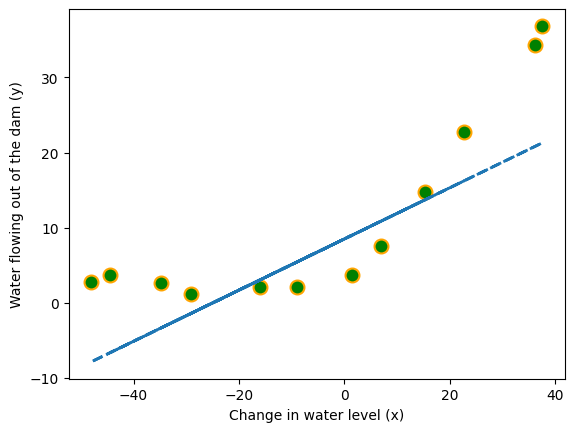

In [22]:
plt.plot(X_[1:, :], y_, "go", ms= 10, mec= "orange", mew= 1.5)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.plot(X_[1,:], np.matmul(theta_new.T, X_)[0, :], "--", lw= 2);



In [23]:
def Learning_Curve(X, y, X_val, y_val, lambda_):
  train_error = np.zeros(m)
  val_error = np.zeros(m)

  for i in range(1, m + 1):
    theta = np.zeros((X.shape[0], 1))
    epochs = 100000
    lr = 0.001
    theta_new, J_history, gradtest = Gradient_Descent_With_Reg(X[:, :i], y[:, :i], theta, lr, epochs, lambda_)
    train_error[i- 1] = Compute_Cost_With_Reg(X[:, :i], y[:, :i], theta_new, 0)
    val_error[i- 1] = Compute_Cost_With_Reg(X_val, y_val, theta_new, 0)

  return train_error, val_error

1
2
3
4
5
6
7
8
9
10
11
12
# Training Examples	Train Error	Cross Validation Error
  	1		0.000016	181.603572
  	2		0.000016	110.667776
  	3		3.286615	44.971999
  	4		2.842689	48.338954
  	5		13.154052	35.858531
  	6		19.443965	33.822654
  	7		20.098524	31.965551
  	8		18.172860	30.858614
  	9		22.609407	31.132841
  	10		23.261462	28.935174
  	11		24.317250	29.551049
  	12		22.373907	29.433177


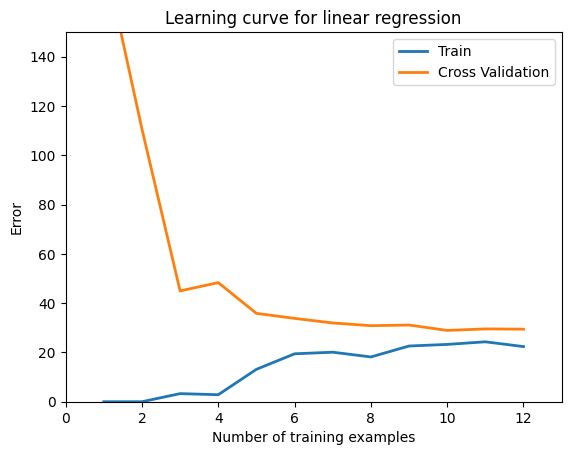

In [24]:
J_train, J_cv = Learning_Curve(X_, y_, X_val_, y_val_, lambda_= 1)

plt.plot(np.arange(1, m + 1), J_train, np.arange(1, m + 1), J_cv, lw= 2)
plt.title("Learning curve for linear regression")
plt.legend(["Train", "Cross Validation"])
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.axis([0, 13, 0, 150])

print("# Training Examples\tTrain Error\tCross Validation Error")
for i in range(m):
    print("  \t%d\t\t%f\t%f" % (i+1, J_train[i], J_cv[i]))

In [25]:
print(J_cv)

[181.6035724  110.66777555  44.97199883  48.33895446  35.85853128
  33.82265429  31.96555141  30.85861445  31.13284085  28.93517405
  29.55104876  29.43317671]


In [26]:
def Poly_Features(X, p):
    X_poly = np.zeros((X.shape[0], p))

    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)

    return X_poly

In [27]:
X_poly = Poly_Features(X, 8)
X_poly_val = Poly_Features(X_val, 8)
X_poly_test = Poly_Features(X_test, 8)

In [28]:
X_poly.shape

(12, 8)

In [29]:
X_poly_val.shape

(21, 8)

In [30]:
X_poly_test.shape

(21, 8)

In [31]:
X_poly[:, 1]

array([2.53980260e+02, 8.49896197e+02, 1.30968343e+03, 1.40566411e+03,
       2.30965109e+03, 7.99496701e+01, 2.34328523e+02, 1.20452489e+03,
       1.92974986e+00, 1.96991814e+03, 4.91892115e+01, 5.18142738e+02])

In [32]:
X[:, 0]

array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
       -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
         1.38915437, -44.38375985,   7.01350208,  22.76274892])

In [33]:
def Feature_Normalize(X):
  X_norm = X.copy()
  mean = np.mean(X_norm, axis= 0)
  range_1 = np.max(X_norm, axis= 0) - np.min(X_norm, axis= 0)
  X_norm = (X_norm - mean) / (range_1)

  return X_norm, mean, range_1

In [34]:
X_poly[0, :]

array([-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,  6.45059724e+04,
       -1.02801608e+06,  1.63832436e+07, -2.61095791e+08,  4.16102047e+09])

In [35]:
X_poly.shape

(12, 8)

In [36]:
X_poly_norm, mean, range_1 = Feature_Normalize(X_poly)

X_poly_normv = X_poly_val - mean
X_poly_normv /= range_1


X_poly_normt = X_poly_test - mean
X_poly_normt /= range_1

In [37]:
X_poly_norm.shape

(12, 8)

In [38]:
X_poly_normv.shape

(21, 8)

In [39]:
X_poly_normt.shape

(21, 8)

In [40]:
X_poly_norm_ = np.transpose(X_poly_norm)
print(X_poly_norm_.shape)

(8, 12)


In [41]:
X_poly_normv_ = np.transpose(X_poly_normv)
print(X_poly_normv_.shape)

(8, 21)


In [42]:
X_poly_normt_ = np.transpose(X_poly_normt)
print(X_poly_normt_.shape)

(8, 21)


In [43]:
y_ = np.transpose(y)
print(y_.shape)

(1, 12)


In [44]:
y_val_ = np.transpose(y_val)
print(y_val_.shape)

(1, 21)


In [45]:
y_test_ = np.transpose(y_test)
print(y_test_.shape)

(1, 21)


In [46]:
X_poly_norm_ = np.concatenate([np.ones((1, m)), X_poly_norm_], axis= 0)
print(X_poly_norm_.shape)

(9, 12)


In [47]:
X_poly_normv_ = np.concatenate([np.ones((1, m_val)), X_poly_normv_], axis= 0)
print(X_poly_normv_.shape)

(9, 21)


In [48]:
X_poly_normt_ = np.concatenate([np.ones((1, m_test)), X_poly_normt_], axis= 0)
print(X_poly_normt_.shape)

(9, 21)


In [49]:
theta = np.ones((X_poly_norm_.shape[0], 1))

epochs = 50000
lr = 0.003

theta_new, J_history, gradtest = Gradient_Descent_With_Reg(X_poly_norm_, y_, theta, lr, epochs, lambda_= 0)

print(theta_new)
print(gradtest)
print("last cost: ", J_history[-1])

12
[[11.21758933]
 [29.64903068]
 [18.4543683 ]
 [ 9.42833232]
 [ 6.49734071]
 [ 4.70072101]
 [ 2.31316073]
 [ 3.79473533]
 [ 0.26549812]]
[[-10.21758933]
 [ -3.39693417]
 [ -0.44731864]
 [ -2.38393571]
 [  0.13530747]
 [ -1.8589532 ]
 [  0.48272369]
 [ -1.52762138]
 [  0.67954436]]
last cost:  1.1776222300923553


In [50]:
print(min(J_history))

1.1776222300923553


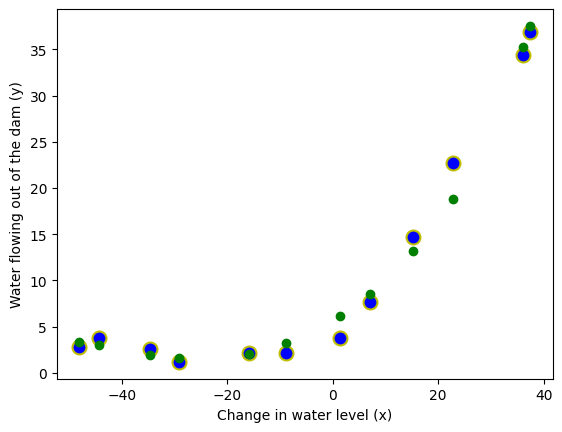

In [51]:
plt.plot(X_[1:, :], y_, "bo", ms= 10, mec= "y", mew= 1.5)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.plot(X_[1, :], np.matmul(theta_new.T, X_poly_norm_)[0, :], "go");

In [52]:
def plotFit(Poly_Features, min_x, max_x, mean, range_1, theta, p):
    x = np.arange(min_x - 15, max_x + 45, 0.05).reshape(-1, 1)
    print(x.shape)

    X_poly = Poly_Features(x, p)
    X_poly -= mean
    X_poly /= range_1
    print(X_poly.shape)

    X_poly = X_poly.T
    print(X_poly.shape)

    X_poly = np.concatenate([np.ones((1, X_poly.shape[1])), X_poly], axis= 0)

    plt.plot(x, np.matmul(theta.T, X_poly)[0, :], "--", lw=2)
    plt.xlim(-80, 80)
    plt.ylim(-60, 50)

(2912, 1)
(2912, 8)
(8, 2912)


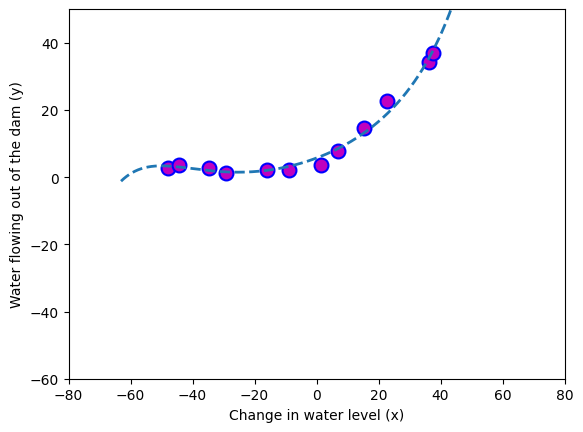

In [53]:
min_x = np.min(X_[1, :])
max_x = np.max(X_[1, :])

plt.plot(X_[1:, :], y_, "mo", ms= 10, mec= "b", mew= 1.5)
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plotFit(Poly_Features, min_x, max_x, mean, range_1, theta_new, 8)

In [54]:
def val_Curve(X, y, X_val, y_val, cost_function):
  lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.4, 0.6, 1]

  error_train = np.zeros(len(lambda_vec))
  error_val = np.zeros(len(lambda_vec))

  for i in range(len(lambda_vec)):
    theta_1 = np.ones((X.shape[0], 1))
    epochs = 500000
    lr = 0.003
    theta_new_1, J_history, gradtest = Gradient_Descent_With_Reg(X, y, theta_1, lr, epochs, lambda_= lambda_vec[i])

    error_train[i] = cost_function(X, y, theta_new_1, lambda_= 0)
    error_val[i] = cost_function(X_val, y_val, theta_new_1, lambda_= 0)

    print("train error", error_train[i])
    print("val error", error_val[i])
    print(J_history[-1])

  return lambda_vec, error_train, error_val

In [55]:
print(X_poly_normv_.shape)

(9, 21)


In [56]:
lambda_vec, J_train, J_cv = val_Curve(X_poly_norm_, y_, X_poly_normv_, y_val_, Compute_Cost_With_Reg)

12
train error 0.31408855416301035
val error 11.651451150942265
0.31408855416301035
12
train error 0.32246340001005175
val error 11.01004615116453
0.4265593561441744
12
train error 0.344147623735574
val error 9.905946905101128
0.6387544673489636
12
train error 0.45015118005775134
val error 7.364157581236702
1.2865304665896709
12
train error 0.7962886098095051
val error 4.891666092809965
2.7451344108725486
12
train error 1.710824772656493
val error 3.971030081399651
6.573486627956686
12
train error 4.162438750792982
val error 3.4172947362466357
14.78455563168962
12
train error 5.583882436116227
val error 3.6757422331378393
18.113884333345432
12
train error 8.625003202115344
val error 5.084660593223866
23.72730671218728
12
train error 14.686704303829679
val error 9.671422433912882
32.09443941029495


lambda		Train Error	Validation Error
 0.000000	0.314089	11.651451
 0.001000	0.322463	11.010046
 0.003000	0.344148	9.905947
 0.010000	0.450151	7.364158
 0.030000	0.796289	4.891666
 0.100000	1.710825	3.971030
 0.300000	4.162439	3.417295
 0.400000	5.583882	3.675742
 0.600000	8.625003	5.084661
 1.000000	14.686704	9.671422


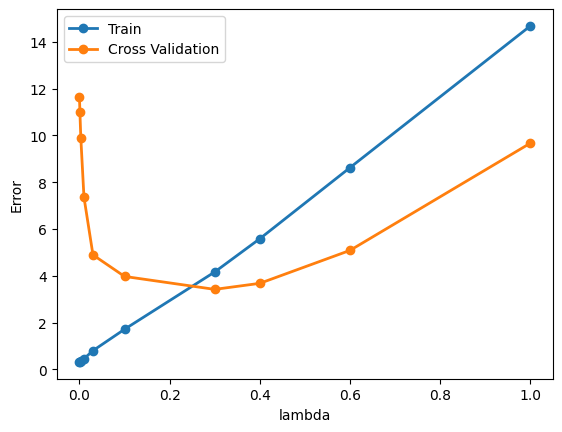

In [57]:
plt.plot(lambda_vec, J_train, "-o", lambda_vec, J_cv, "-o", lw= 2)
plt.legend(["Train", "Cross Validation"])
plt.xlabel("lambda")
plt.ylabel("Error")

print("lambda\t\tTrain Error\tValidation Error")
for i in range(len(lambda_vec)):
    print(" %f\t%f\t%f" % (lambda_vec[i], J_train[i], J_cv[i]))

In [58]:
theta = np.ones((X_poly_norm_.shape[0], 1))

epochs = 500000
lr = 0.003

thetanew, J_history, gradtest = Gradient_Descent_With_Reg(X_poly_norm_, y_, theta, lr, epochs, lambda_= 0.3)

12


In [59]:
def error_test(X_test, y_test):
  error_test = Compute_Cost_With_Reg(X_test, y_test, theta_new, 0)
  return error_test

In [60]:
J_test = error_test(X_poly_normt_, y_test_)
print(J_test)

[[3.48518891]]
